In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline

In [2]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../data/ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('../data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [3]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

In [4]:
lens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

In [5]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean, np.max, np.min, np.median]})
movie_stats.head()

rating                           
                            size      mean amax amin median
title                                                      
'Til There Was You (1997)      9  2.333333    4    1    2.0
1-900 (1994)                   5  2.600000    4    1    3.0
101 Dalmatians (1996)        109  2.908257    5    1    3.0
12 Angry Men (1957)          125  4.344000    5    2    4.0
187 (1997)                    41  3.024390    5    1    3.0

In [6]:
movie_stats.sort_values([('rating', 'mean')], ascending=False).head(20)

rating                      \
                                                     size      mean amax amin   
title                                                                           
They Made Me a Criminal (1939)                          1  5.000000    5    5   
Marlene Dietrich: Shadow and Light (1996)               1  5.000000    5    5   
Saint of Fort Washington, The (1993)                    2  5.000000    5    5   
Someone Else's America (1995)                           1  5.000000    5    5   
Star Kid (1997)                                         3  5.000000    5    5   
Great Day in Harlem, A (1994)                           1  5.000000    5    5   
Aiqing wansui (1994)                                    1  5.000000    5    5   
Santa with Muscles (1996)                               2  5.000000    5    5   
Prefontaine (1997)                                      3  5.000000    5    5   
Entertaining Angels: The Dorothy Day Story (1996)       1  5.000000    5    5   
Pather Panchali (1955)                                  8  4.625000    5    4   
Some Mother's Son (1996)                                2  4.500000    5    4   
Maya Lin: A Strong Clear Vision (1994)                  4  4.500000    5    3   
Anna (1996)                                             2  4.500000    5    4   
Everest (1998)                                          2  4.500000    5    4   
Close Shave, A (1995)                                 112  4.491071    5    1   
Schindler's List (1993)                               298  4.466443    5    1   
Wrong Trousers, The (1993)                            118  4.466102    5    1   
Casablanca (1942)                                     243  4.456790    5    1   
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761    5    1   

                                                           
                                                   median  
title                                                      
They Made Me a Criminal (1939)                        5.0  
Marlene Dietrich: Shadow and Light (1996)             5.0  
Saint of Fort Washington, The (1993)                  5.0  
Someone Else's America (1995)                         5.0  
Star Kid (1997)                                       5.0  
Great Day in Harlem, A (1994)                         5.0  
Aiqing wansui (1994)                                  5.0  
Santa with Muscles (1996)                             5.0  
Prefontaine (1997)                                    5.0  
Entertaining Angels: The Dorothy Day Story (1996)     5.0  
Pather Panchali (1955)                                5.0  
Some Mother's Son (1996)                              4.5  
Maya Lin: A Strong Clear Vision (1994)                5.0  
Anna (1996)                                           4.5  
Everest (1998)                                        4.5  
Close Shave, A (1995)                                 5.0  
Schindler's List (1993)                               5.0  
Wrong Trousers, The (1993)                            5.0  
Casablanca (1942)                                     5.0  
Wallace & Gromit: The Best of Aardman Animation...    5.0

In [7]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False).head(15)

rating                           
                                         size      mean amax amin median
title                                                                   
Close Shave, A (1995)                     112  4.491071    5    1    5.0
Schindler's List (1993)                   298  4.466443    5    1    5.0
Wrong Trousers, The (1993)                118  4.466102    5    1    5.0
Casablanca (1942)                         243  4.456790    5    1    5.0
Shawshank Redemption, The (1994)          283  4.445230    5    1    5.0
Rear Window (1954)                        209  4.387560    5    2    5.0
Usual Suspects, The (1995)                267  4.385768    5    1    5.0
Star Wars (1977)                          583  4.358491    5    1    5.0
12 Angry Men (1957)                       125  4.344000    5    2    4.0
Citizen Kane (1941)                       198  4.292929    5    2    5.0
To Kill a Mockingbird (1962)              219  4.292237    5    1    4.0
One Flew Over the Cuckoo's Nest (1975)    264  4.291667    5    1    4.0
Silence of the Lambs, The (1991)          390  4.289744    5    1    4.0
North by Northwest (1959)                 179  4.284916    5    2    4.0
Godfather, The (1972)                     413  4.283293    5    1    5.0

In [8]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

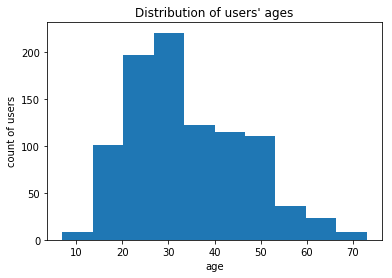

In [9]:
users.age.plot.hist(bins=10)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [10]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


In [11]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [12]:
lens.set_index('movie_id', inplace=True)

In [13]:
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

In [14]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),0.0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
"Fugitive, The (1993)",0.0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
"Full Monty, The (1997)",0.0,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",0.0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
Groundhog Day (1993),0.0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


In [15]:
lens.reset_index('movie_id', inplace=True)

In [16]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [17]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [18]:
pivoted.reset_index('movie_id', inplace=True)

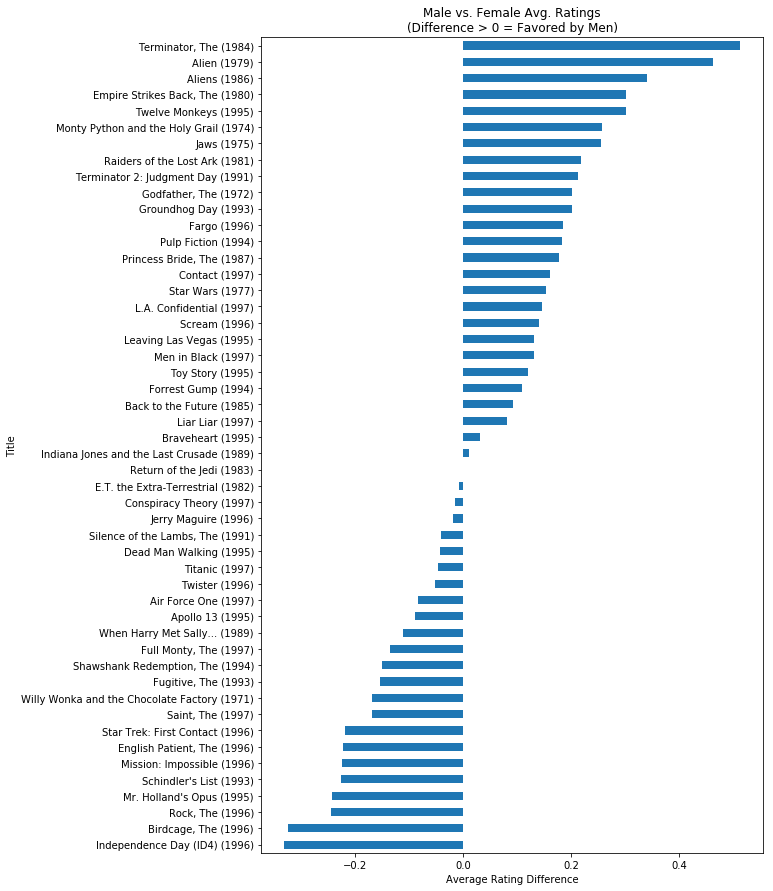

In [19]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');